In [1]:
# Importing th required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from sklearn.cluster import KMeans
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (168, 300, 3)


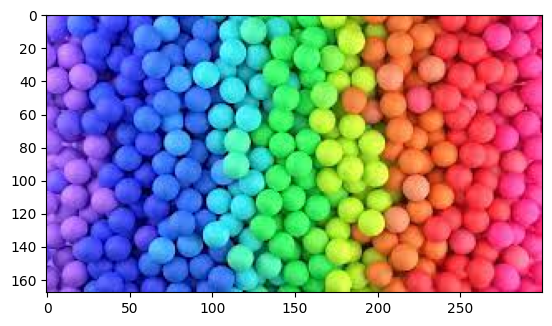

In [9]:
# Working with OpenCV
image = cv2.imread("/content/download.jpeg")
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

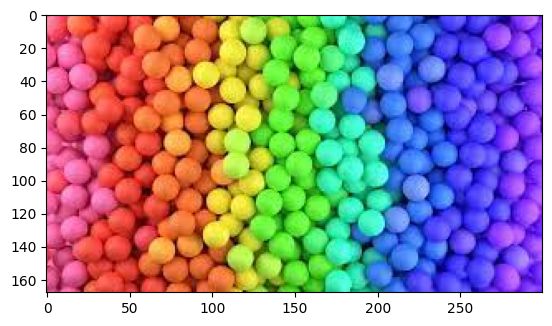

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

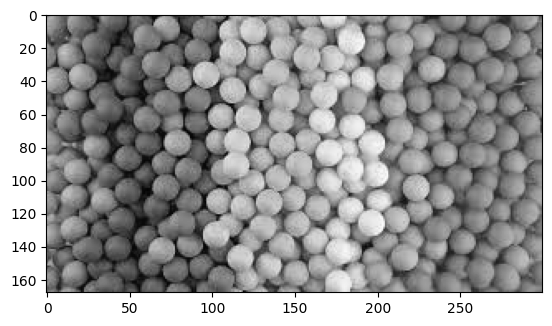

In [11]:
# Gray scaling
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

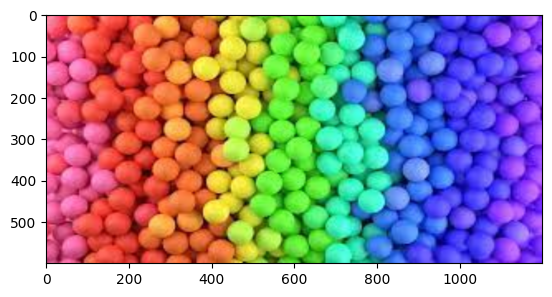

In [12]:
# Resizing the image
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [13]:
# RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [14]:
# Reading image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [15]:
# Getting colors from an image
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
   # We will get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([100.75459626,  92.38477549, 244.8659472 ]),
 array([236.33536491,  99.57626138,  93.01450393]),
 array([101.09015526, 224.77196542,  58.49603035]),
 array([216.49744526, 210.49580292,  65.61304745]),
 array([ 38.01379074,  47.29468268, 188.22325901]),
 array([ 31.74479952, 127.89749774,  37.06421465]),
 array([165.96908842,  46.00047978,  27.77443454]),
 array([ 60.61159825, 228.48644878, 175.52740136])]

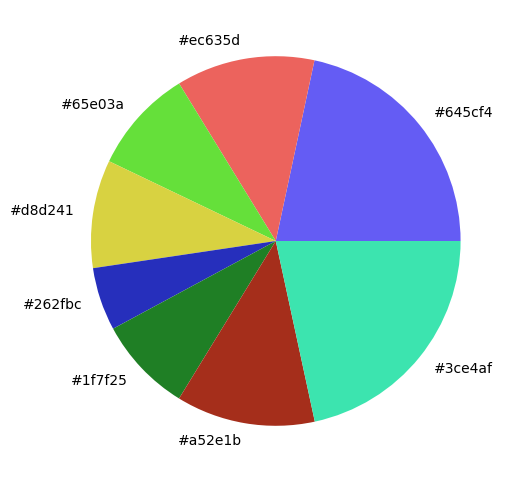

In [17]:
# Calling the function
get_colors(get_image("/content/download.jpeg"),8,True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([ 60.58685913, 228.44967646, 175.47147835]),
 array([216.46731787, 210.54035056,  65.61447873]),
 array([166.22570726,  46.09751264,  27.91082411]),
 array([100.87842105, 224.49578947,  58.33710526]),
 array([ 38.21478344,  47.32511272, 188.51045225]),
 array([ 31.40504023, 126.99666009,  37.10141187]),
 array([236.39891787,  99.66450242,  93.08548792]),
 array([100.84760506,  92.49027719, 244.92260409])]

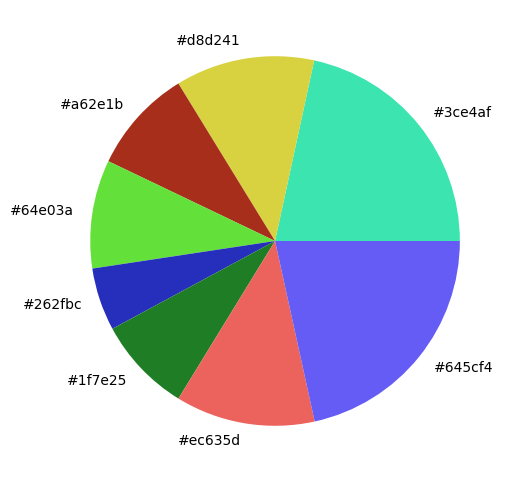

In [19]:
# Calling the function
get_colors(get_image("/content/download.jpeg"),8,True)